In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

驱虫市场分析

分析目的:针对各个子类目市场近三年的交易额数据,以及top100品牌数据(2017年
11月到2018年10月),通过描述性分析,在年变化的维度上:
分析过程:
·
1. 分析整个市场的总体趋势
2. 分析各子类目市场占比及变化趋势
3. 分析市场集中度,即是否存在垄断
·
读取各子类目市场近三年交易额数

In [142]:
sns.set()

In [11]:
import os

In [5]:
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data\驱虫剂市场')

In [12]:
import glob

In [7]:
files = glob.glob(f'*近三年交易额.xlsx')
files

['灭鼠杀虫剂市场近三年交易额.xlsx',
 '电蚊香套装市场近三年交易额.xlsx',
 '盘香灭蟑香蚊香盘市场近三年交易额.xlsx',
 '蚊香加热器市场近三年交易额.xlsx',
 '蚊香液市场近三年交易额.xlsx',
 '蚊香片市场近三年交易额.xlsx',
 '防霉防蛀片市场近三年交易额.xlsx']

In [8]:
temp = pd.read_excel(files[1])
temp.head()

,时间,交易金额
0,43374,106531.29
1,43344,105666.63
2,43313,201467.03
3,43282,438635.29
4,43252,953749.78


In [9]:
temp.时间.dtype

dtype('int64')

In [10]:
# 如何把int型的数字转化为datetime类型.
# 数字实际上是时间戳.是以天为单位的时间戳
pd.to_datetime(temp['时间'], unit='D', origin='1899-12-30')

0    2018-10-01
1    2018-09-01
2    2018-08-01
3    2018-07-01
4    2018-06-01
5    2018-05-01
6    2018-04-01
7    2018-03-01
8    2018-02-01
9    2018-01-01
10   2017-12-01
11   2017-11-01
12   2017-10-01
13   2017-09-01
14   2017-08-01
15   2017-07-01
16   2017-06-01
17   2017-05-01
18   2017-04-01
19   2017-03-01
20   2017-02-01
21   2017-01-01
22   2016-12-01
23   2016-11-01
24   2016-10-01
25   2016-09-01
26   2016-08-01
27   2016-07-01
28   2016-06-01
29   2016-05-01
30   2016-04-01
31   2016-03-01
32   2016-02-01
33   2016-01-01
34   2015-12-01
35   2015-11-01
Name: 时间, dtype: datetime64[ns]

In [11]:
s = '灭鼠杀虫剂市场近三年交易额.xlsx'

In [12]:
import re

In [13]:
re.match(r'(.*?)市场近三年交易额.*?', s).group(1)

'灭鼠杀虫剂'

In [14]:
temps = []
for file_name in files:
    temp = pd.read_excel(file_name)
    if temp.时间.dtype == 'int64':
        temp['时间'] = pd.to_datetime(temp['时间'], unit='D', origin='1899-12-30')
    # 把时间设为行索引
    temp.set_index(keys='时间', inplace=True)
    # 设置各个市场的列名
    col_name = re.match(r'(.*?)市场近三年交易额.*?', file_name).group(1)
    temp.columns = [col_name]
    temps.append(temp)

In [15]:
len(temps)

7

In [16]:
df = pd.concat(temps, axis=1)

In [17]:
df.reset_index(inplace=True)

In [18]:
# 对18年少了11, 12月份的数据进行填充, 这种销售数据是很有规律性的数据, 不太好用平均值这样的数字去填充.

# 既然是有规律的数据, 那我们可以使用往年的历史数据去预测未来的数据.
# 取出11, 12月的数据
# 时间类型通过dt 可以把pandas的datetime类型变成Python的datetime对象,这样就可以使用Python datetime对象的方法
df['month'] = df.时间.dt.month

In [19]:
# 可以通过月份提取11, 12月的数据
month11 = df.loc[df['month'] == 11, '灭鼠杀虫剂']

In [20]:
plt.rcParams['font.sans-serif'] = 'SimHei'

In [21]:
df.columns[1:-1]

Index(['灭鼠杀虫剂', '电蚊香套装', '盘香灭蟑香蚊香盘', '蚊香加热器', '蚊香液', '蚊香片', '防霉防蛀片'], dtype='object')

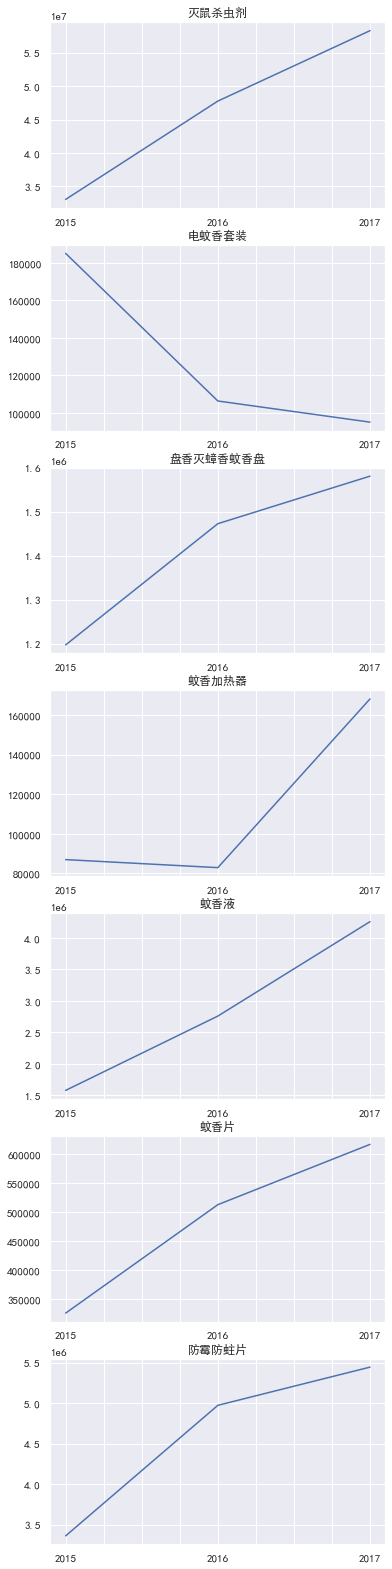

In [22]:
plt.figure(figsize=(1*6, 4*7))
for i, col in enumerate(df.columns[1:-1]):
    month11 = df.loc[df['month'] == 11, col][::-1]
    month11.index = ['2015', '2016', '2017']
    axes = plt.subplot(7, 1, i+1)
    month11.plot(ax=axes)
    axes.set_title(col)

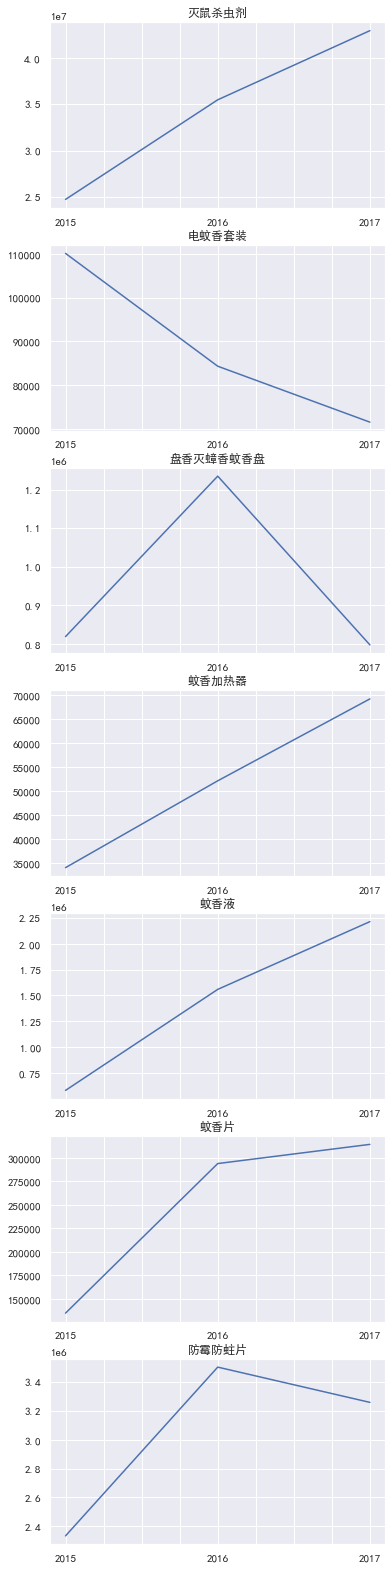

In [23]:
plt.figure(figsize=(1*6, 4*7))
for i, col in enumerate(df.columns[1:-1]):
    month12 = df.loc[df['month'] == 12, col][::-1]
    month12.index = ['2015', '2016', '2017']
    axes = plt.subplot(7, 1, i+1)
    month12.plot(ax=axes)
    axes.set_title(col)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from pandas import DataFrame

In [26]:
# 1.准备数据

In [27]:
import datetime

In [28]:
df.drop(columns='month', inplace=True)

In [29]:
df.columns[1:]

Index(['灭鼠杀虫剂', '电蚊香套装', '盘香灭蟑香蚊香盘', '蚊香加热器', '蚊香液', '蚊香片', '防霉防蛀片'], dtype='object')

In [30]:
# 经过观察,发现确实很有规律, 用机器学习算法, 比如线性回归,根据历史的年份, 预测未来数据
for month in [11, 12]:
    y_s = []
    for col in df.columns[1:]:
        month_data = df.loc[df.时间.dt.month == month, col][::-1]
        X_train = np.array(['2015', '2016', '2017']).reshape(-1, 1)
        y_train = month_data.values.copy()
        # 训练
        linear = LinearRegression()
        linear.fit(X_train, y_train)
        # 准备预测数据
        X_test = np.array([2018]).reshape(-1, 1)
        # 预测结果是一个ndarry
        y_ = linear.predict(X_test)[0]
        y_s.append(y_)
    # 把预测的数据拼接到原始数据上
    data = [datetime.datetime(year=2018, month=month, day=1)] + y_s
    print(data)
    columns = df.columns
    print(columns)
    temp = DataFrame(data=[data], columns=columns)
    df = temp.append(df)

[datetime.datetime(2018, 11, 1, 0, 0), 71752495.99333572, 38692.609999999404, 1801318.8199999928, 193874.38666665554, 5543203.826666832, 776627.0433334112, 6678677.549999952]
Index(['时间', '灭鼠杀虫剂', '电蚊香套装', '盘香灭蟑香蚊香盘', '蚊香加热器', '蚊香液', '蚊香片', '防霉防蛀片'], dtype='object')
[datetime.datetime(2018, 12, 1, 0, 0), 52567630.680000305, 50204.52999999374, 928554.256666664, 86849.16666666418, 3081491.990000248, 426812.5866666734, 3958717.5799999237]
Index(['时间', '灭鼠杀虫剂', '电蚊香套装', '盘香灭蟑香蚊香盘', '蚊香加热器', '蚊香液', '蚊香片', '防霉防蛀片'], dtype='object')


c:\users\ause\desktop\python2101\2101\env\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pl

In [31]:
df.reset_index(drop=True, inplace=True)

In [62]:
df.head()

,时间,年份,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
0,2018-12-01,2018,5.256763e+07,50204.53,9.285543e+05,86849.166667,3.081492e+06,4.268126e+05,3958717.58
1,2018-11-01,2018,7.175250e+07,38692.61,1.801319e+06,193874.386667,5.543204e+06,7.766270e+05,6678677.55
2,2018-10-01,2018,1.136548e+08,106531.29,4.171283e+06,315639.480000,7.814546e+06,1.032414e+06,8541153.59
3,2018-09-01,2018,1.440261e+08,105666.63,6.784500e+06,457366.410000,1.065497e+07,1.566652e+06,8825870.43
4,2018-08-01,2018,1.540426e+08,201467.03,1.070968e+07,746513.130000,1.783558e+07,2.617149e+06,6320153.44


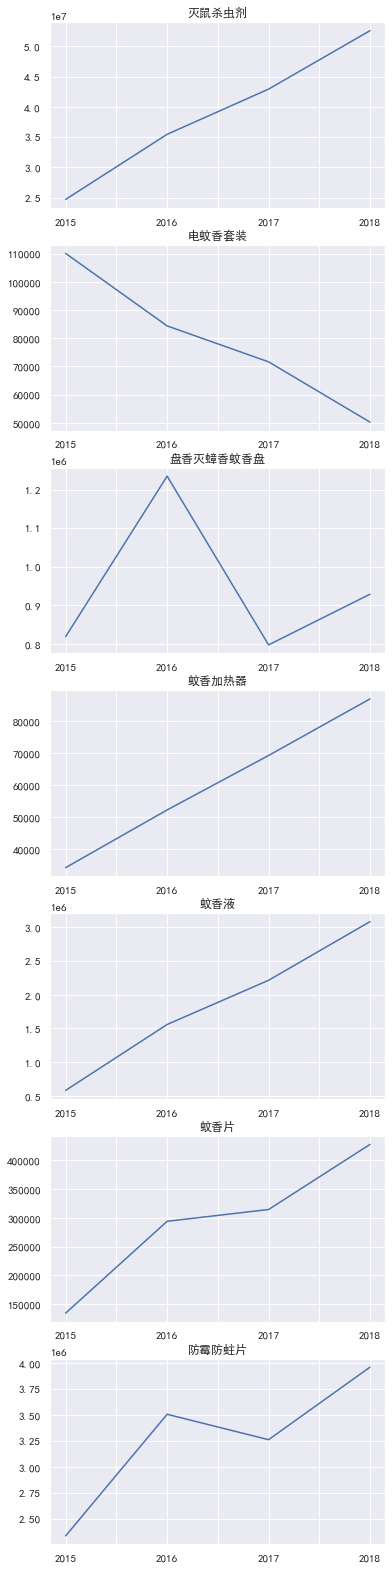

In [32]:
plt.figure(figsize=(1*6, 4*7))
for i, col in enumerate(df.columns[1:]):
    month12 = df.loc[df.时间.dt.month == 12, col][::-1]
    month12.index = ['2015', '2016', '2017', '2018']
    axes = plt.subplot(7, 1, i+1)
    month12.plot(ax=axes)
    axes.set_title(col)

In [33]:
# 按照年份查看驱虫市场的总体变化趋势
df = df.iloc[:-2].copy()

In [34]:
# 创建一列年份
df.insert(1, '年份', df.时间.dt.year)

In [35]:
# 按照年份进行分组
data_year = df.groupby(by='年份').sum()

In [40]:
data_year.sum(axis=1)

年份
2016    9.179661e+08
2017    1.395873e+09
2018    1.760111e+09
dtype: float64

In [41]:
data_ratio = data_year.div(data_year.sum(axis=1), axis='index')

In [42]:
data_ratio

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
年份,,,,,,,
2016,0.662385,0.008352,0.052129,0.006433,0.185726,0.030481,0.054493
2017,0.607343,0.006718,0.061865,0.007560,0.236458,0.035153,0.044903
2018,0.646489,0.002578,0.067092,0.009566,0.203514,0.029456,0.041305


Text(-0.1, 0.5, '66.23%')

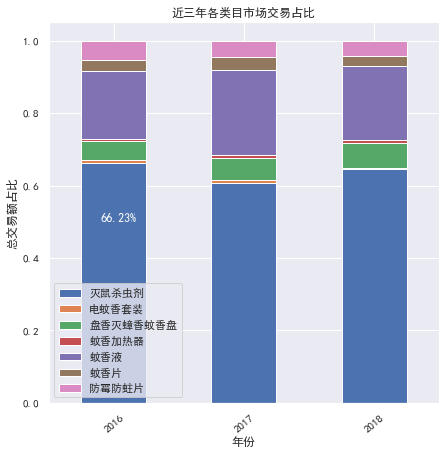

In [43]:
data_ratio.plot(kind='bar', stacked=True, figsize=(7, 7), rot='40')
plt.ylabel('总交易额占比')
plt.title('近三年各类目市场交易占比')
plt.text(0-0.1, 0.5, '66.23%', fontdict=dict(color='white'))

In [44]:
data_year

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
年份,,,,,,,
2016,6.080471e+08,7666572.12,4.785285e+07,5.905205e+06,1.704905e+08,27980839.47,50023001.94
2017,8.477740e+08,9377531.68,8.635539e+07,1.055284e+07,3.300656e+08,49068587.96,62678822.18
2018,1.137893e+09,4537682.09,1.180885e+08,1.683672e+07,3.582077e+08,51845921.56,72701365.23


In [45]:
growth2016 = (data_year.loc[2017] - data_year.loc[2016]) / data_year.loc[2016]

In [46]:
growth2017 = (data_year.loc[2018] - data_year.loc[2017]) / data_year.loc[2017]

In [47]:
year_growth = pd.concat((growth2016, growth2017), axis=1).stack().unstack(level=0)

In [48]:
year_growth.index = ['2016', '2017']

In [49]:
year_growth

,灭鼠杀虫剂,电蚊香套装,盘香灭蟑香蚊香盘,蚊香加热器,蚊香液,蚊香片,防霉防蛀片
2016,0.394257,0.223171,0.804603,0.787041,0.935976,0.753650,0.253000
2017,0.342213,-0.516111,0.367471,0.595468,0.085262,0.056601,0.159903


In [50]:
plt.rcParams['axes.unicode_minus'] = False

([<matplotlib.axis.XTick at 0x22df81c7748>,
 [Text(0, 0, '16-17'), Text(1, 0, '17-18')])

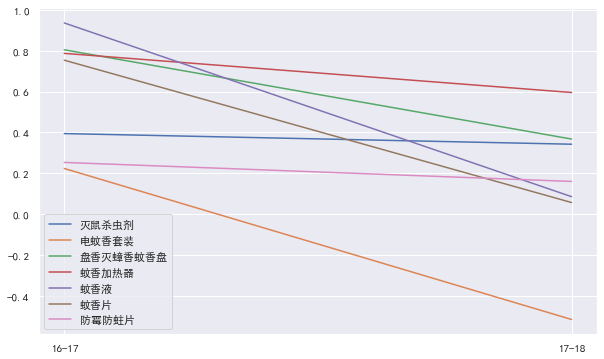

In [51]:
year_growth.plot(figsize=(10, 6))
plt.xticks([0, 1], ['16-17', '17-18'])

In [52]:
 # 从年增幅看

In [53]:
top100 = pd.read_excel('top100品牌数据.xlsx')

In [54]:
top100

,品牌,行业排名,交易指数,交易增长幅度,支付转化指数,操作
0,PREMISE/拜灭士,1,530344,-0.3235,1521,趋势分析
1,科凌虫控,2,474937,-0.1910,1581,趋势分析
2,ARS/安速,3,402372,-0.2682,1448,趋势分析
3,思乐智,4,360780,0.2056,841,趋势分析
4,希诺,5,346656,-0.1085,1865,趋势分析
...,...,...,...,...,...,...
95,BK/帮科,96,67812,-0.5008,1134,趋势分析
96,博尔康,97,66180,-0.2571,792,趋势分析
97,无比滴,98,65779,-0.6264,959,趋势分析
98,厚生,99,65520,-0.4708,1600,趋势分析


In [55]:
# 通过交易指数占比, 来模拟市场份额
top100_share  = top100.交易指数 / top100.交易指数.sum()

In [56]:
top100_share.sort_values(ascending=True, inplace=True)

In [57]:
top100_share

99    0.004425
98    0.004447
97    0.004465
96    0.004492
95    0.004603
        ...   
4     0.023530
3     0.024488
2     0.027311
1     0.032237
0     0.035998
Name: 交易指数, Length: 100, dtype: float64

<AxesSubplot:>

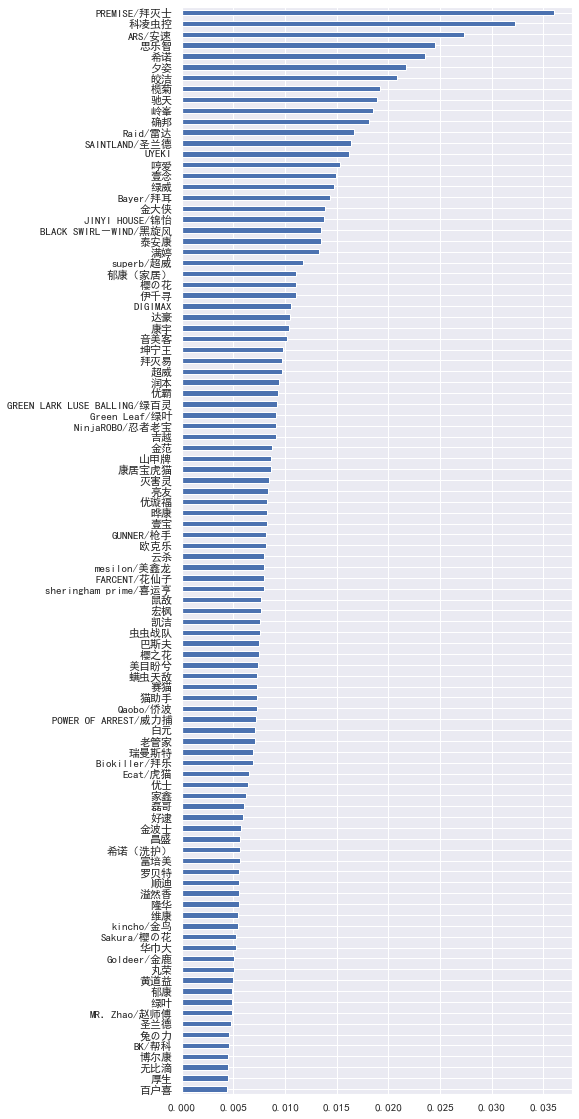

In [58]:
top100_share.index = top100.品牌.values[::-1]
top100_share.plot(kind='barh', figsize=(7, 20))

In [64]:
top100_share.values

array([0.00442511, 0.00444723, 0.00446481, 0.00449203, 0.0046028 ,
       0.00460776, 0.00480528, 0.00484594, 0.00487736, 0.00488951,
       0.00495433, 0.00505574, 0.00510739, 0.00524715, 0.00527437,
       0.00541121, 0.00543815, 0.00550311, 0.00551879, 0.00553203,
       0.00559257, 0.00559705, 0.00563187, 0.00568801, 0.00569887,
       0.00589516, 0.00606051, 0.00624133, 0.00644061, 0.00652356,
       0.00688323, 0.00690434, 0.00707166, 0.00711333, 0.00716919,
       0.00725777, 0.00726361, 0.00728072, 0.00730868, 0.00734364,
       0.00745733, 0.00747803, 0.00759668, 0.00761643, 0.00762776,
       0.00765118, 0.00791685, 0.00792146, 0.0079292 , 0.00794427,
       0.00816711, 0.00819874, 0.00820681, 0.00824964, 0.00826193,
       0.00838526, 0.00843393, 0.00864163, 0.00864292, 0.0087184 ,
       0.00908438, 0.009104  , 0.00914357, 0.00926561, 0.00928428,
       0.0094275 , 0.00968549, 0.00974651, 0.00976701, 0.01018479,
       0.0103405 , 0.0105279 , 0.01058587, 0.01105774, 0.01108

In [59]:
HHI = (top100_share.values ** 2).sum()
HHI

0.013546334007208914

In [60]:
1 / HHI

73.82071042009099

驱虫市场的潜力分析-结论
1. 整体驱虫市场处于快速增长阶段,趋向于成长期到成熟期
2. 灭鼠杀虫剂市场份额较大(大于60%),约是第二名蚊香液的二倍,市场增长率接近40%,
可以认为是明星产品类目,需要持续投资和重点关注
3. 驱虫市场不存在垄断,结构不集中,竞争相对激烈,即没有明显的来自大公司的压力

### 灭鼠杀虫剂市场机会点-业务逻辑
1. 子类目市场确定后(灭鼠杀虫剂市场):确定市场中最受欢迎的产品类别–>细分价格段
    –>属性进一步分析:什么样的价格作为主市场,什么样的商品符合大众口味
2. 不同用途的商品定位:
    1. 引流商品:价格低,利润空间几乎没有,目的是为了引流
        获取流量的方式有免费和付费两种,免费流量看缘分(lian),控制付费流量成本
        即是对流量精准度的要求,即精准营销
    2. 利润商品:价格合理,只要的盈利来源
    3. 品牌商品:价格偏高,门面商品或奢侈品
3. 商品布局时要考虑的问题:价格,产品特征,用户喜好度,商品需求等

In [86]:
# 切换目录
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data\灭鼠杀虫剂细分市场')

In [87]:
files = glob.glob('*.xlsx')
files

['杀虫.xlsx', '灭鼠.xlsx', '虱子.xlsx', '螨.xlsx', '蟑螂.xlsx']

In [88]:
temps = []
temps = [pd.read_excel(file_name) for file_name in files]

In [89]:
len(temps)

5

In [90]:
# 把5个细分市场的数据级联在一起
df = pd.concat(temps)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6556 entries, 0 to 1742
Columns: 229 entries, 类别 to 产品名
dtypes: float64(129), int64(5), object(95)
memory usage: 11.5+ MB


In [92]:
# 缺失值处理
df.isnull().any()

类别      False
时间      False
页码      False
排名      False
链接      False
        ...  
宝贝成份     True
规格：      True
樟脑       True
包装       True
产品名      True
Length: 229, dtype: bool

In [93]:
# 查看每一列, 缺失的比例
df.isnull().mean()

类别      0.0
时间      0.0
页码      0.0
排名      0.0
链接      0.0
       ... 
宝贝成份    1.0
规格：     1.0
樟脑      1.0
包装      1.0
产品名     1.0
Length: 229, dtype: float64

In [94]:
# 定一个阈值, 缺失值大于0.98的特征, 删掉, 缺太多, 没用
df.isnull().mean() >= 0.98

类别      False
时间      False
页码      False
排名      False
链接      False
        ...  
宝贝成份     True
规格：      True
樟脑       True
包装       True
产品名      True
Length: 229, dtype: bool

In [95]:
df = df.loc[:, ~(df.isnull().mean() >= 0.98)].copy()

In [96]:
df

,类别,时间,页码,排名,链接,主图链接,主图视频链接,宝贝标题,宝贝ID,销量（人数）,...,生产企业,农药生产许可证/批准文号,农药产品标准证号,农药名称,剂型,农药成分,有效成分总含量,毒性,防治对象,农药类型
0,杀虫,2018/11/22 18:49:48,16,18,https://item.taobao.com/item.htm?id=578459866289,https://gw3.alicdn.com/bao/uploaded/i3/4089164...,https://cloud.video.taobao.com/play/u/40891647...,德国拜耳臭虫杀虫剂家用杀灭除跳蚤药苍蝇猫狗窝喷剂蟑螂药,578459866289,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,杀虫,2018/11/22 18:49:49,16,19,https://item.taobao.com/item.htm?id=548196868239,https://gw3.alicdn.com/bao/uploaded/i3/1519846...,NaN,蟑螂屋灭蟑螂药家用强力灭蟑清捕捉器除杀蟑螂贴粘板粉杀虫剂特价,548196868239,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,杀虫,2018/11/22 18:49:49,16,20,https://item.taobao.com/item.htm?id=580839295562,https://gw3.alicdn.com/bao/uploaded/i2/1052281...,NaN,日本Hengai哼爱螨虫贴除螨虫垫祛螨床上用品沙发吸螨包家用杀虫,580839295562,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,杀虫,2018/11/22 18:49:50,17,1,https://item.taobao.com/item.htm?id=580264662322,https://gw2.alicdn.com/bao/uploaded/i4/2844890...,NaN,蚧壳虫专杀小白药小黑飞多肉花卉介壳虫用专治dx柑橘树植物杀虫剂,580264662322,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,杀虫,2018/11/22 18:49:52,17,2,https://item.taobao.com/item.htm?id=44484517973,https://gw1.alicdn.com/bao/uploaded/i3/2094913...,NaN,雷达杀虫气雾剂清香型家用式蚊子苍蝇蟑螂蚂蚁除虫杀虫剂害虫喷剂,44484517973,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,蟑螂,2018/11/22 19:22:37,100,16,https://item.taobao.com/item.htm?id=567322968739,https://gw3.alicdn.com/bao/uploaded/i4/1809710...,NaN,达豪杀蟑笔剂正品神笔蟑螂药跳蚤杀蟑粉笔画笔蚂蚁强效触杀全巢灭,567322968739,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1739,蟑螂,2018/11/22 19:22:38,100,17,https://item.taobao.com/item.htm?id=547638024194,https://gw3.alicdn.com/bao/uploaded/i4/2825064...,NaN,榄菊速杀杀虫气雾剂 杀蟑螂、跳蚤等蚊虫2件24瓶375元包邮,547638024194,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,蟑螂,2018/11/22 19:22:39,100,18,https://item.taobao.com/item.htm?id=572950517334,https://gw3.alicdn.com/bao/uploaded/i1/4682278...,NaN,全无敌家用室内600ml杀虫剂无香卧室 驱杀蟑螂蚂蚁苍蝇喷雾气雾剂,572950517334,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,蟑螂,2018/11/22 19:22:40,100,19,https://item.taobao.com/item.htm?id=540393439567,https://gw2.alicdn.com/bao/uploaded/i4/2995676...,NaN,云杀 蟑螂小强药杀蟑胶饵除灭蟑螂屋粘贴板驱蟑粉厨房家用虫剂,540393439567,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# 删除特征值完全一致的特征
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)

类目


In [106]:
df.drop(columns=['类目'], inplace=True)

In [107]:
df.shape

(6556, 37)

In [108]:
# 查找列索引的遗失索引
df.columns.get_loc('药品登记号')

24

In [101]:
df.iloc[:, 24:].isnull().mean()

物理形态            0.286303
药品登记号           0.927090
产品名称            0.796980
农药登记证号          0.873093
生产企业            0.888957
农药生产许可证/批准文号    0.889262
农药产品标准证号        0.889262
农药名称            0.889262
剂型              0.882093
农药成分            0.885754
有效成分总含量         0.889262
毒性              0.873093
防治对象            0.889262
农药类型            0.973612
dtype: float64

In [111]:
# 删除药品登记号及其后面的特征
df = df.iloc[:, :24].copy()

依据逻辑删除不可能会用到的列,包括：
'时间','链接','主图链接','主图视频链接',
'页码','排名','宝贝标题','运费','下架时间','旺旺'

In [121]:
df.drop(columns=['时间','链接','主图链接','主图视频链接',
'页码','排名','宝贝标题','运费','下架时间','旺旺'], inplace=True)

In [122]:
df.shape

(6556, 14)

In [123]:
df.dtypes

类别         object
宝贝ID       object
销量（人数）      int64
售价        float64
预估销售额     float64
评价人数      float64
收藏人数        int64
地域         object
店铺类型       object
品牌         object
型号         object
净含量        object
适用对象       object
物理形态       object
dtype: object

In [124]:
df.宝贝ID

0       578459866289
1       548196868239
2       580839295562
3       580264662322
4        44484517973
            ...     
6551    567322968739
6552    547638024194
6553    572950517334
6554    540393439567
6555    567544678713
Name: 宝贝ID, Length: 6556, dtype: object

In [125]:
# 把宝贝ID改成字符串类型
df = df.astype({'宝贝ID': 'object'}).copy()

In [126]:
# 重置索引
df.reset_index(drop=True, inplace=True)

灭鼠杀虫剂市场机会点-产品类别

In [130]:
df

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态
0,杀虫,578459866289,99,29.9,2960.1,26.0,202,NaN,天猫,拜耳,特姆得,NaN,蟑螂,液体
1,杀虫,548196868239,99,0.6,59.4,1330.0,242,浙江 金华,淘宝,佰凌,180325,NaN,NaN,NaN
2,杀虫,580839295562,99,98.0,9702.0,44.0,27,广东 深圳,淘宝,NaN,NaN,NaN,NaN,NaN
3,杀虫,580264662322,99,6.9,683.1,24.0,26,河南 商丘,淘宝,SHURONGCROP/树荣作物,NaN,30g,NaN,NaN
4,杀虫,44484517973,99,18.8,1861.2,121.0,133,河北 秦皇岛,天猫,Raid/雷达,雷达杀虫气雾剂清香,600ml,蟑螂,喷雾
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6551,蟑螂,567322968739,14,9.9,138.6,536.0,76,上海 上海,淘宝,达豪,NaN,NaN,NaN,NaN
6552,蟑螂,547638024194,14,375.0,5250.0,16.0,70,湖南 常德,淘宝,榄菊,速杀型杀虫气雾剂600ml,600ML,蟑螂,喷雾
6553,蟑螂,572950517334,14,20.8,291.2,32.0,14,河北 秦皇岛,天猫,全无敌,全无敌杀虫气雾剂无香600ml,NaN,NaN,喷雾
6554,蟑螂,540393439567,14,7.9,110.6,180.0,109,浙江 杭州,淘宝,云杀,蟑螂,10g,蟑螂,啫喱


In [128]:
# 查看各产品’类别’总的’预估销售额’的分布,以此表示市场分布情况

<AxesSubplot:ylabel='预估销售额'>

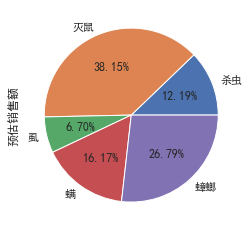

In [200]:
df.groupby(by='类别')['预估销售额'].sum().plot(kind='pie', autopct='%.2f%%')

In [201]:
# 灭鼠占比组高, 选择灭鼠这个细分市场进行研究
# 从原始数据中筛选出类别为灭鼠的数据
derat = df.loc[df['类别'] == '灭鼠'].copy()

In [202]:
# 重置索引
derat.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='售价', ylabel='Count'>

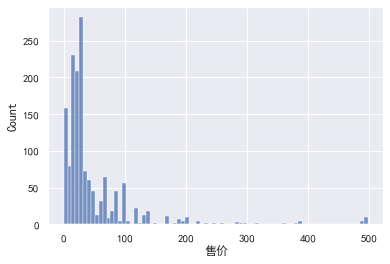

In [203]:
sns.histplot(x='售价', data=derat)

In [204]:
# 对售价进行区分
bins = [0, 50, 100, 150, 200, 250, 300, 500]
labels = ['0-50', '50-100','100-150', '150-200','200-250', '250-300', '300以上']
derat['价格区间'] = pd.cut(derat['售价'], bins=bins, labels=labels)

In [205]:
# 计算各个价格区间的预估销售额总和
collection = derat.groupby(by='价格区间')[['预估销售额']].sum()
collection

,预估销售额
价格区间,
0-50,15162086.51
50-100,3335060.19
100-150,2758086.29
150-200,629813.00
200-250,2743758.00
250-300,237740.00
300以上,819468.00


In [206]:
# 计算预估销售额占比
collection['预估销售额占比'] = collection.预估销售额 / collection.预估销售额.sum()

In [207]:
collection

,预估销售额,预估销售额占比
价格区间,,
0-50,15162086.51,0.590286
50-100,3335060.19,0.129840
100-150,2758086.29,0.107377
150-200,629813.00,0.024520
200-250,2743758.00,0.106819
250-300,237740.00,0.009256
300以上,819468.00,0.031903


In [208]:
derat.groupby(by='价格区间')[['宝贝ID']].count()

,宝贝ID
价格区间,
0-50,1138
50-100,242
100-150,62
150-200,35
200-250,9
250-300,9
300以上,28


In [209]:
# 宝贝有重复的情况. 所以刚才把宝贝ID改成了object, 就是为了方便去重
collection['宝贝数'] = derat.drop_duplicates(subset=['宝贝ID']).groupby(by='价格区间')[['宝贝ID']].count()

In [210]:
collection

,预估销售额,预估销售额占比,宝贝数
价格区间,,,
0-50,15162086.51,0.590286,854
50-100,3335060.19,0.129840,172
100-150,2758086.29,0.107377,46
150-200,629813.00,0.024520,28
200-250,2743758.00,0.106819,7
250-300,237740.00,0.009256,9
300以上,819468.00,0.031903,18


In [211]:
collection['宝贝数占比'] = collection.宝贝数 / collection.宝贝数.sum()

In [214]:
# 单宝贝平均销售额
collection['单宝贝平均销售额'] = collection.预估销售额 / collection.宝贝数

In [215]:
collection

,预估销售额,预估销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额
价格区间,,,,,
0-50,15162086.51,0.590286,854,0.753086,17754.199660
50-100,3335060.19,0.129840,172,0.151675,19389.884826
100-150,2758086.29,0.107377,46,0.040564,59958.397609
150-200,629813.00,0.024520,28,0.024691,22493.321429
200-250,2743758.00,0.106819,7,0.006173,391965.428571
250-300,237740.00,0.009256,9,0.007937,26415.555556
300以上,819468.00,0.031903,18,0.015873,45526.000000


In [216]:
# 根据单宝贝平均销售额, 计算各个价格区间的相对竞争度
def convert(x):
    return 1 - (x - x.min()) / (x.max() - x.min())

In [217]:
collection['相对竞争度'] = collection['单宝贝平均销售额'].transform(convert)

In [218]:
collection.sort_values(by='相对竞争度', inplace=True)

In [219]:
collection

,预估销售额,预估销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
价格区间,,,,,,
200-250,2743758.00,0.106819,7,0.006173,391965.428571,0.000000
100-150,2758086.29,0.107377,46,0.040564,59958.397609,0.887218
300以上,819468.00,0.031903,18,0.015873,45526.000000,0.925786
250-300,237740.00,0.009256,9,0.007937,26415.555556,0.976854
150-200,629813.00,0.024520,28,0.024691,22493.321429,0.987336
50-100,3335060.19,0.129840,172,0.151675,19389.884826,0.995629
0-50,15162086.51,0.590286,854,0.753086,17754.199660,1.000000


Text(0, 0.5, '销售额占比')

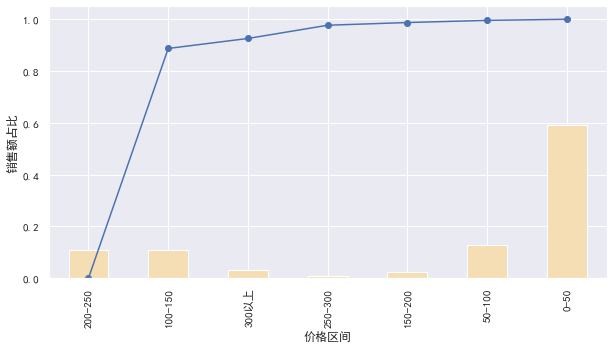

In [230]:
# 画出销售额占比的柱状图, 和相对竞争度的折线图
plt.figure(figsize=(10, 5))
collection['预估销售额占比'].plot(kind='bar', color='wheat')
collection['相对竞争度'].plot(marker='o', rot=90)
plt.ylabel('销售额占比')

In [ ]:
# 0-50区间占了销售的大头, 但是竞争非常激烈
# 200-250这个区间, 竞争和鸟

In [286]:
# 选择容量最大的0-50细分市场进一步分析
# 筛选0-50之间价格区间的数据
derat50 = derat.loc[derat.loc[:, '价格区间'] == '0-50'].copy()


,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间
0,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50
1,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,0-50
2,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体,0-50
3,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体,0-50
4,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,灭鼠,573793765449,0,17.16,NaN,6.0,0,北京,淘宝,NaN,NaN,NaN,老鼠,NaN,0-50
1514,灭鼠,36825350895,0,0.60,NaN,10.0,63,NaN,淘宝,剑牌,NaN,NaN,老鼠,固体,0-50
1518,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,达豪,A1中外型,NaN,老鼠,NaN,0-50
1519,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体,0-50


In [288]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
derat50['价格区间'] = pd.cut(derat50['售价'], bins=bins, labels=labels)
derat50

,类别,宝贝ID,销量（人数）,售价,预估销售额,评价人数,收藏人数,地域,店铺类型,品牌,型号,净含量,适用对象,物理形态,价格区间
0,灭鼠,566054780243,9976,26.80,267356.8,11901.0,11596,广东 韶关,天猫,优璇福,MT007,NaN,老鼠,胶水,20-30
1,灭鼠,566054780243,9976,26.80,267356.8,NaN,11596,广东 深圳,天猫,优璇福,MT007,NaN,老鼠,胶水,20-30
2,灭鼠,572115448996,9945,9.90,98455.5,26442.0,3569,NaN,淘宝,创驰,21/32,NaN,老鼠,固体,0-10
3,灭鼠,39868408322,99,29.90,2960.1,20.0,352,河南 南阳,天猫,云杀,粘鼠板,NaN,老鼠,固体,20-30
4,灭鼠,520282897220,99,39.90,3950.1,559.0,1250,NaN,淘宝,得硕,NaN,g,老鼠,固体,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,灭鼠,573793765449,0,17.16,NaN,6.0,0,北京,淘宝,NaN,NaN,NaN,老鼠,NaN,10-20
1514,灭鼠,36825350895,0,0.60,NaN,10.0,63,NaN,淘宝,剑牌,NaN,NaN,老鼠,固体,0-10
1518,灭鼠,573118678210,0,22.00,NaN,3.0,0,NaN,淘宝,达豪,A1中外型,NaN,老鼠,NaN,20-30
1519,灭鼠,550586926422,0,38.00,NaN,0.0,1,NaN,淘宝,易捕,NaN,1kg,老鼠,固体,30-40


In [625]:
def process_data(df, by,order_by='相对竞争度', ascending=True):
    collection = df.groupby(by=by)[['预估销售额']].sum()
    collection['销售额占比'] = collection['预估销售额'] / collection['预估销售额'].sum()
    collection['宝贝数'] = df.drop_duplicates(subset=['宝贝ID']).groupby(by=by)['宝贝ID'].count()
    collection['宝贝数占比'] = collection['宝贝数'] / collection['宝贝数'].sum()
    collection['单宝贝平均销售额'] = collection['预估销售额'] / collection['宝贝数']
    collection['相对竞争度'] =  collection['单宝贝平均销售额'].transform(convert)
    # 根据相对竞争度排序
    collection.sort_values(by=order_by, inplace=True)
    return collection

In [295]:
collection50 = process_data(derat50, '价格区间')

In [299]:
def draw_collection(collection):
    plt.figure(figsize=(10, 5))
    collection['销售额占比'].plot(kind='bar', color='wheat')
    collection['相对竞争度'].plot(marker='o', rot=90)
    plt.ylabel('销售额占比')

In [300]:
collection50

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
价格区间,,,,,,
10-20,8102634.14,0.534401,272,0.318501,29789.096103,0.000000
20-30,4969620.92,0.327766,278,0.325527,17876.334245,0.411674
40-50,707568.49,0.046667,40,0.046838,17689.212250,0.418141
30-40,1240874.19,0.081841,98,0.114754,12661.981531,0.591869
0-10,141388.77,0.009325,166,0.194379,851.739578,1.000000


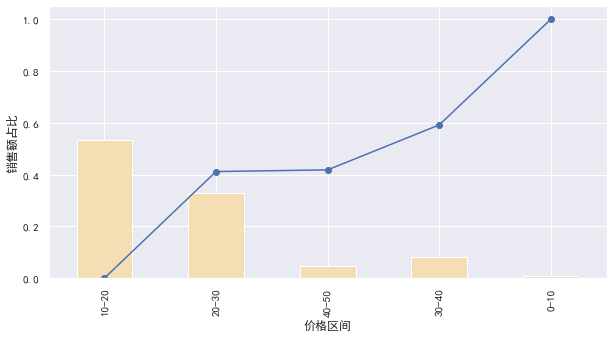

In [301]:
draw_collection(collection50)

<BarContainer object of 7 artists>

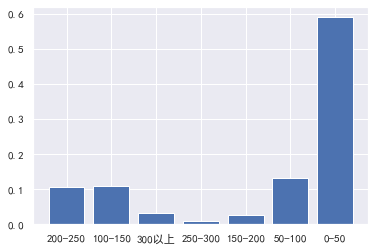

In [227]:
plt.bar(collection.index, height=collection['预估销售额占比'])

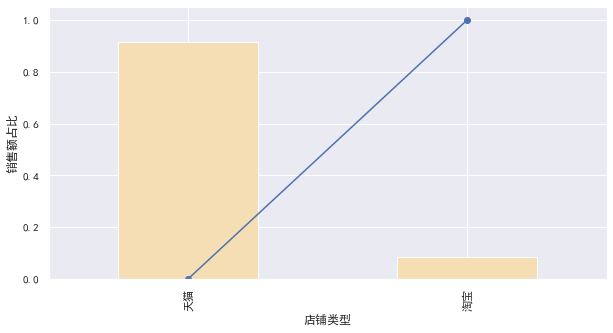

In [302]:
draw_collection(process_data(derat, by='店铺类型'))

In [626]:
process_data(df=derat50, by='型号', order_by='预估销售额').tail(19)[::-1]

,预估销售额,销售额占比,宝贝数,宝贝数占比,单宝贝平均销售额,相对竞争度
型号,,,,,,
超强力粘鼠板,2120129.32,0.142219,12,0.021661,176677.443333,0.669585
粘鼠板老鼠贴,2051699.02,0.137629,7,0.012635,293099.860000,0.451856
0005,927590.70,0.062223,2,0.003610,463795.350000,0.132628
驰天粘鼠板,876606.33,0.058803,4,0.007220,219151.582500,0.590151
QL-866,759629.30,0.050956,3,0.005415,253209.766667,0.526457
MT007,534713.60,0.035869,1,0.001805,534713.600000,0.000000
强力粘鼠魔毯,496974.60,0.033337,1,0.001805,496974.600000,0.070578
拜灭士5g,420982.40,0.028240,1,0.001805,420982.400000,0.212696
CQL-1,391271.40,0.026247,1,0.001805,391271.400000,0.268260


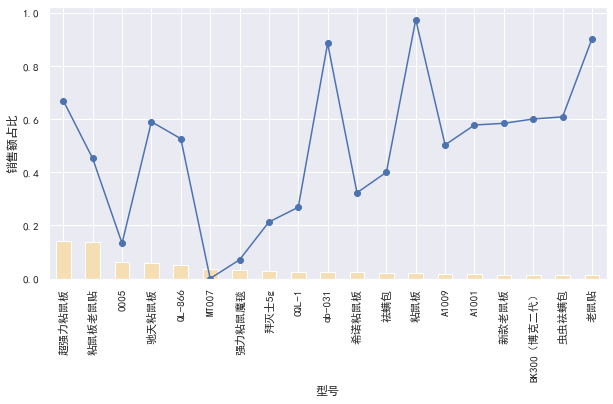

In [627]:
draw_collection(process_data(by='型号', df=derat50, order_by='预估销售额').tail(19)[::-1])

## 3 竞争分析

### 3.1品类分布-产品类别

In [304]:
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data\竞争数据\商品销售数据')

In [316]:
files = glob.glob('*.xlsx')
files

['安速家居近30天销售数据.xlsx', '拜耳近30天销售数据.xlsx', '科凌虫控旗舰店近30天销售数据.xlsx']

In [307]:
# 分析拜耳产品类别分部
bayer = pd.read_excel(files[1])
bayer.head()

,序号,店铺名称,商品名称,商品ID,主图链接,商品链接,商品原价,商品售价,30天销售量,总销量,类目,物理形态,型号,净含量,使用对象,销售额
0,1,拜耳官方旗舰店,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,527604730327,http://img.alicdn.com/bao/uploaded/i4/24285941...,https://detail.m.tmall.com/item.htm?id=5276047...,109.0,39.9,43542,3023212,灭鼠/杀虫剂,啫喱,5g,5g,蟑螂,1737325.8
1,2,拜耳官方旗舰店,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,535731556857,http://img.alicdn.com/bao/uploaded/i4/24285941...,https://detail.m.tmall.com/item.htm?id=5357315...,199.0,59.9,4860,285440,灭鼠/杀虫剂,啫喱,拜灭易,12g,蚂蚁,291114.0
2,3,拜耳官方旗舰店,德国拜耳进口白蚁药除灭防杀白蚁杀虫剂全窝端家用特傚触杀型粉药,530229854741,http://img.alicdn.com/bao/uploaded/i4/24285941...,https://detail.m.tmall.com/item.htm?id=5302298...,199.0,89.9,838,70516,灭鼠/杀虫剂,液体,特密得100ml,100ml,白蚁,75336.2
3,4,拜耳官方旗舰店,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,569753894890,http://img.alicdn.com/bao/uploaded/i2/24285941...,https://detail.m.tmall.com/item.htm?id=5697538...,198.0,79.9,1487,19602,灭鼠/杀虫剂,啫喱,拜灭士5g-除敌,5g+5ml*4,蟑螂,118811.3
4,5,拜耳官方旗舰店,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,549862604116,http://img.alicdn.com/bao/uploaded/i2/24285941...,https://detail.m.tmall.com/item.htm?id=5498626...,109.0,39.9,1641,155203,灭鼠/杀虫剂,液体,除敌,20ml,杀虫剂,65475.9


In [308]:
bayer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      15 non-null     int64  
 1   店铺名称    15 non-null     object 
 2   商品名称    15 non-null     object 
 3   商品ID    15 non-null     int64  
 4   主图链接    15 non-null     object 
 5   商品链接    15 non-null     object 
 6   商品原价    15 non-null     float64
 7   商品售价    15 non-null     float64
 8   30天销售量  15 non-null     int64  
 9   总销量     15 non-null     int64  
 10  类目      15 non-null     object 
 11  物理形态    11 non-null     object 
 12  型号      15 non-null     object 
 13  净含量     13 non-null     object 
 14  使用对象    15 non-null     object 
 15  销售额     15 non-null     float64
dtypes: float64(3), int64(4), object(9)
memory usage: 2.0+ KB


In [310]:
bayer.shape

(15, 16)

In [311]:
bayer.类目.unique()

array(['灭鼠/杀虫剂'], dtype=object)

Text(0, 0.5, '')

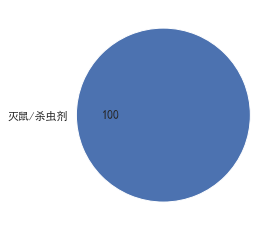

In [315]:
bayer.groupby(by='类目')['销售额'].sum().plot(kind='pie', autopct='%d')
plt.ylabel('')

In [317]:
ansu = pd.read_excel(files[0])
ansu.head()

,序号,店铺名称,商品名称,商品ID,主图链接,商品链接,商品原价,商品售价,30天销售量,总销量,类目,适用对象,30天销售额
0,1,安速家居旗舰店,日本进口安速小强恢恢灭蟑螂屋药无毒捕捉器克星家用强力清全窝端,527032566392,http://img.alicdn.com/bao/uploaded/i3/27967673...,https://detail.m.tmall.com/item.htm?id=5270325...,60.0,54.4,2540,236321,灭鼠/杀虫剂,蟑螂,138176.0
1,2,安速家居旗舰店,日本进口安速小强恢恢蟑螂屋5片药捕捉器灭杀蟑螂克星家用全窝端,534230487113,http://img.alicdn.com/bao/uploaded/i3/27967673...,https://detail.m.tmall.com/item.htm?id=5342304...,32.0,29.9,883,10498,灭鼠/杀虫剂,蟑螂,26401.7
2,3,安速家居旗舰店,日本安速小强恢恢蟑螂屋药6片 无毒捕捉器强力灭清克星家用全窝端,527797679530,http://img.alicdn.com/bao/uploaded/i3/27967673...,https://detail.m.tmall.com/item.htm?id=5277976...,33.4,29.9,1073,117070,灭鼠/杀虫剂,蟑螂,32082.7
3,4,安速家居旗舰店,日本进口安速红阿斯杀虫烟雾剂弹烟熏灭跳蚤蟑螂克星家用全窝端,527113108079,http://img.alicdn.com/bao/uploaded/i4/27967673...,https://detail.m.tmall.com/item.htm?id=5271131...,48.0,45.5,471,55672,灭鼠/杀虫剂,蟑螂,21430.5
4,5,安速家居旗舰店,日本安速小黑帽小强黑克杀蟑饵剂9枚 蟑螂药屋蟑螂克星家用全窝端,531350777813,http://img.alicdn.com/bao/uploaded/i2/27967673...,https://detail.m.tmall.com/item.htm?id=5313507...,58.0,48.0,566,19705,灭鼠/杀虫剂,蟑螂,27168.0


In [321]:
ansu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      45 non-null     int64  
 1   店铺名称    45 non-null     object 
 2   商品名称    45 non-null     object 
 3   商品ID    45 non-null     int64  
 4   主图链接    45 non-null     object 
 5   商品链接    45 non-null     object 
 6   商品原价    45 non-null     float64
 7   商品售价    45 non-null     float64
 8   30天销售量  45 non-null     int64  
 9   总销量     45 non-null     int64  
 10  类目      45 non-null     object 
 11  适用对象    45 non-null     object 
 12  30天销售额  45 non-null     float64
dtypes: float64(3), int64(4), object(6)
memory usage: 4.7+ KB


In [318]:
ansu.类目.unique()

array(['灭鼠/杀虫剂', '空调清洁剂', '漱口水', '空气芳香剂', '蚊香液', '蚊香片'], dtype=object)

Text(0, 0.5, '')

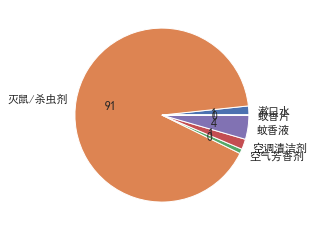

In [322]:
ansu.groupby(by='类目')['30天销售额'].sum().plot(kind='pie', autopct='%d')
plt.ylabel('')

In [323]:
# 分析产品类别分部
keling = pd.read_excel(files[2])
keling.head()

,序号,店铺名称,商品名称,商品ID,主图链接,商品链接,商品原价,商品售价,30天销售量,总销量,类目,适用对象,30天销售额
0,1,科凌虫控旗舰店,蟑螂药一窝端蟑螂屋胶饵灭蟑螂无毒厨房家用强力杀蟑螂克星全窝端,541418255867,http://img.alicdn.com/bao/uploaded/i1/28323986...,https://detail.m.tmall.com/item.htm?id=5414182...,49.9,16.8,76608,3175991,灭鼠/杀虫剂,蟑螂,1287014.4
1,2,科凌虫控旗舰店,蟑螂屋强力灭蟑清蟑螂贴家用无毒粉杀蟑螂药胶饵捕捉器克星全窝端,528722144927,http://img.alicdn.com/bao/uploaded/i1/28323986...,https://detail.m.tmall.com/item.htm?id=5287221...,39.0,19.8,5852,174989,灭鼠/杀虫剂,蟑螂,115869.6
2,3,科凌虫控旗舰店,科凌虫控蟑螂药屋蟑螂克星杀蟑胶饵灭蟑螂粉全窝端家用强力灭蟑清,545526161662,http://img.alicdn.com/bao/uploaded/i2/28323986...,https://detail.m.tmall.com/item.htm?id=5455261...,49.9,39.0,2497,74352,灭鼠/杀虫剂,蟑螂,97383.0
3,4,科凌虫控旗舰店,米面蛾诱捕器蛾子粘捕器家用小飞虫杀虫剂灭飞蛾除米蛾衣蛾蚋蛾蠓,536261470312,http://img.alicdn.com/bao/uploaded/i4/28323986...,https://detail.m.tmall.com/item.htm?id=5362614...,49.0,29.8,540,76572,灭鼠/杀虫剂,蛾,16092.0
4,5,科凌虫控旗舰店,粘鼠板超强力驱老鼠贴灭鼠抓老鼠夹药捕鼠器黏老鼠胶沾鼠神器家用,553350699341,http://img.alicdn.com/bao/uploaded/i3/28323986...,https://detail.m.tmall.com/item.htm?id=5533506...,48.9,13.8,6408,324171,灭鼠/杀虫剂,鼠,88430.4


In [324]:
keling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      27 non-null     int64  
 1   店铺名称    27 non-null     object 
 2   商品名称    27 non-null     object 
 3   商品ID    27 non-null     int64  
 4   主图链接    27 non-null     object 
 5   商品链接    27 non-null     object 
 6   商品原价    27 non-null     float64
 7   商品售价    27 non-null     float64
 8   30天销售量  27 non-null     int64  
 9   总销量     27 non-null     int64  
 10  类目      27 non-null     object 
 11  适用对象    27 non-null     object 
 12  30天销售额  27 non-null     float64
dtypes: float64(3), int64(4), object(6)
memory usage: 2.9+ KB


Text(0, 0.5, '')

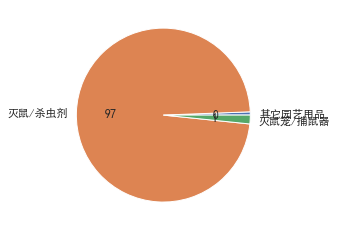

In [325]:
keling.groupby(by='类目')['30天销售额'].sum().plot(kind='pie', autopct='%d')
plt.ylabel('')

<AxesSubplot:ylabel='销售额'>

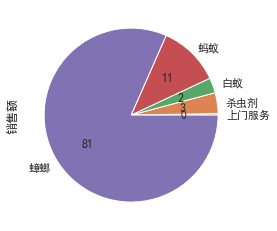

In [326]:
# 查看品类分部
# 适用对象
bayer.groupby(by='使用对象')['销售额'].sum().plot(kind='pie', autopct='%d')

In [ ]:
# 拜耳使用对象主要是蟑螂

<AxesSubplot:ylabel='30天销售额'>

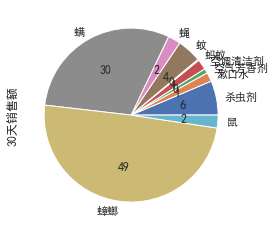

In [328]:
ansu.groupby(by='适用对象')['30天销售额'].sum().plot(kind='pie', autopct='%d')

In [ ]:
# 安速适用对象比较丰富

<AxesSubplot:ylabel='30天销售额'>

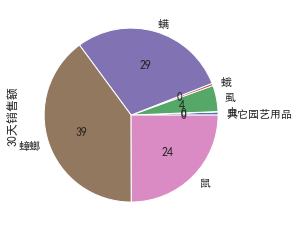

In [329]:
keling.groupby(by='适用对象')['30天销售额'].sum().plot(kind='pie', autopct='%d')

### 3.2产品结构分析

In [13]:
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data\竞争数据\商品交易数据')

In [14]:
files = glob.glob('*.xlsx')
files

['安速全店商品交易数据.xlsx', '拜耳全店商品交易数据.xlsx', '科凌虫控全店商品交易数据.xlsx']

In [18]:
bayer_prod = pd.read_excel(files[1])

In [534]:
bayer_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   品牌      142 non-null    object        
 1   时间      142 non-null    datetime64[ns]
 2   商品      142 non-null    object        
 3   行业排名    142 non-null    int64         
 4   交易指数    142 non-null    int64         
 5   交易增长幅度  142 non-null    float64       
 6   支付转化指数  142 non-null    int64         
 7   操作      142 non-null    object        
 8   交易金额    142 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 10.1+ KB


In [535]:
bayer_prod.drop_duplicates(subset=['商品']).shape

(44, 9)

In [536]:
bayer_prod_total = bayer_prod.groupby(by=['商品'])[['交易增长幅度']].mean()
# bayer_prod_total

,交易增长幅度
商品,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300
德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340
德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740
德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.260600


In [537]:
bayer_prod_total['交易金额'] = bayer_prod.groupby(by=['商品'])['交易金额'].sum()

In [538]:
bayer_prod_total['交易金额占比'] = bayer_prod_total['交易金额'] / bayer_prod_total['交易金额'].sum()

In [539]:
bayer_prod_total['商品个数'] = bayer_prod.groupby(by=['商品'])['商品'].count()

In [525]:
bayer_prod_total

,交易增长幅度,交易金额,交易金额占比,商品个数
商品,,,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523,1
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439,3
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232,5
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330,1
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358,1
德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.58,0.003104,5
德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41,0.018346,5
德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,40103850.97,0.495473,5
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,29.260600,236386.32,0.002920,1


In [526]:
## 其中交易增长幅度可表示市场发展率,交易金额占比可表示市场份额

In [540]:
bayer_prod_total.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,44.000000,4.400000e+01,44.000000,44.000000
mean,25.539933,1.839560e+06,0.022727,3.227273
std,155.083825,6.321050e+06,0.078095,1.668639
min,-0.292100,2.255362e+04,0.000279,1.000000
25%,-0.061040,6.828508e+04,0.000844,1.750000
50%,0.109000,2.061879e+05,0.002547,3.000000
75%,1.287410,7.673291e+05,0.009480,5.000000
max,1030.000000,4.010385e+07,0.495473,5.000000


In [580]:
# 发现数据中有一些异常数据. 使用盖帽法处理异常数据.
# 0.9分位
bayer_prod_total.quantile(0.9)

交易增长幅度    6.717030e+00
交易金额      2.579050e+06
交易金额占比    3.186349e-02
商品个数      5.000000e+00
Name: 0.9, dtype: float64

In [405]:
np.percentile(bayer_prod_total['交易增长幅度'], 90)

6.7170300000000065

In [406]:
# 我们把数据中所有 交易增长幅度大于90%分位数的值, 盖帽称为90%分位数的值
threshold = np.percentile(bayer_prod_total['交易增长幅度'], 90)
bayer_prod_total.loc[bayer_prod_total['交易增长幅度'] >= threshold, '交易增长幅度'] = threshold

In [407]:
bayer_prod_total.loc[bayer_prod_total['交易增长幅度'] >= threshold, '交易增长幅度']

商品
德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮      6.71703
德国拜耳拜灭易进口蚂蚁药一窝端灭蚁饵剂清除蚂蚁粉家用全窝端       6.71703
拜耳灭蚂蚁药家用一窝端室内室外用杀小黄红蚂蚁药神器胶饵拜灭易      6.71703
电子猫超声波驱鼠器家用大功率灭鼠防鼠赶老鼠夹药捕鼠干扰粘鼠板      6.71703
进口蟑螂药一窝端德国拜耳拜灭士杀蟑胶饵诱防蟑螂屋全窝端5+12g    6.71703
Name: 交易增长幅度, dtype: float64

In [500]:
# 把盖帽操作, 写成函数的形式
def mask(s, q=3/4):
    threshold = s.quantile(q)
    s.loc[s >= threshold] = threshold
    return s

In [528]:
bayer_prod_total2 = bayer_prod_total.copy()

In [579]:
bayer_prod_total.head()

,交易增长幅度,交易金额,交易金额占比,商品个数
商品,,,,
17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523,1
德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439,3
德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232,5
德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330,1
德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358,1


In [607]:
bayer_prod_total = bayer_prod_total2.copy()

In [608]:
bayer_prod_total['交易金额'] = mask(bayer_prod_total['交易金额'].copy())
bayer_prod_total['交易增长幅度'] = mask(bayer_prod_total['交易增长幅度'].copy())

In [609]:
bayer_prod_total.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,44.000000,4.400000e+01,44.000000,44.000000
mean,1.171668,6.231250e+05,0.022727,3.227273
std,2.212537,8.363866e+05,0.078095,1.668639
min,-0.292100,2.255362e+04,0.000279,1.000000
25%,-0.061040,6.828508e+04,0.000844,1.750000
50%,0.109000,2.061879e+05,0.002547,3.000000
75%,1.287410,7.673291e+05,0.009480,5.000000
max,6.717030,2.579050e+06,0.495473,5.000000


In [610]:
bayer_prod_total['交易金额占比'] = bayer_prod_total['交易金额'] / bayer_prod_total['交易金额'].sum()

In [611]:
bayer_prod_total.describe()

,交易增长幅度,交易金额,交易金额占比,商品个数
count,44.000000,4.400000e+01,44.000000,44.000000
mean,1.171668,6.231250e+05,0.022727,3.227273
std,2.212537,8.363866e+05,0.030506,1.668639
min,-0.292100,2.255362e+04,0.000823,1.000000
25%,-0.061040,6.828508e+04,0.002491,1.750000
50%,0.109000,2.061879e+05,0.007520,3.000000
75%,1.287410,7.673291e+05,0.027987,5.000000
max,6.717030,2.579050e+06,0.094066,5.000000


In [612]:
# bayer_prod_total['交易金额占比'] = mask(bayer_prod_total['交易金额占比'].copy())

In [613]:
bayer_prod_total.reset_index(inplace=True)

In [592]:
# 找出拜耳公司的问题类, 明星类和奶牛类产品
# 中位数作为波士顿矩阵的分割线
# 市场份额, 用交易金额占比来表示
# 明星类
bayer_prod_total.loc[(bayer_prod_total['交易金额占比'] > bayer_prod_total['交易金额占比'].quantile(0.5)) & (bayer_prod_total['交易增长幅度'] > bayer_prod_total['交易增长幅度'].quantile(0.5))]

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
6,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,512427.426667,0.044280,5
8,德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,6.717030,236386.320000,0.020427,1
20,德国拜耳除敌杀虫剂灭蟑螂药跳蚤苍蝇臭虫除螨虱子喷雾5ml*8,0.325580,512427.426667,0.044280,5
25,拜耳拜灭士 蟑螂药家用全窝端 强力灭除厨房蟑螂屋克星杀德国进口,1.454067,413902.420000,0.035766,3


In [593]:
# 奶牛类
bayer_prod_total.loc[(bayer_prod_total['交易金额占比'] > bayer_prod_total['交易金额占比'].quantile(0.5)) & (bayer_prod_total['交易增长幅度'] < bayer_prod_total['交易增长幅度'].quantile(0.5))]

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,512427.426667,0.044280,5
5,德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.580000,0.021709,5
7,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,512427.426667,0.044280,5
10,德国拜耳拜灭易灭蚁饵剂粉除杀防蚂蚁药杀虫剂全窝端家用室内花园,-0.027300,512427.426667,0.044280,5
14,德国拜耳跳蚤杀虫剂家用潮虫灭蛾蚋虱子臭虫药除蟑螂5ml*4,0.007220,318059.430000,0.027484,5
15,德国拜耳进口白蚁药除灭防杀白蚁杀虫剂全窝端家用特傚触杀型粉药,-0.134425,512427.426667,0.044280,4
16,德国拜耳进口蚂蚁药家用拜灭易灭蚁饵剂杀蚂蚁杀虫剂室内全窝端蚁,-0.047140,214998.610000,0.018579,5
18,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁杀虫剂家用室内全窝端,-0.056240,512427.426667,0.044280,5
19,德国拜耳除敌杀虫剂灭蚊蟑螂蚂蚁药跳蚤苍蝇臭虫除螨虱子家用,-0.075440,393582.710000,0.034011,5
23,必抢 德国进口拜耳蟑螂克星家用小强全窝端蟑螂药杀蟑胶饵灭蟑17g,-0.292100,512427.426667,0.044280,4


In [594]:
# 问题类
bayer_prod_total.loc[(bayer_prod_total['交易金额占比'] < bayer_prod_total['交易金额占比'].quantile(0.5)) & (bayer_prod_total['交易增长幅度'] > bayer_prod_total['交易增长幅度'].quantile(0.5))]

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.002311,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.002503,1
9,德国拜耳拜灭易12g+除敌5ml*4支 进口蚂蚁药全窝端家用杀虫剂组合,0.450550,89566.01,0.007740,2
11,德国拜耳拜灭易进口蚂蚁药一窝端灭蚁饵剂清除蚂蚁粉家用全窝端,6.717030,32246.39,0.002787,1
12,德国拜耳白蚁药杀虫剂全窝端家用除杀防治灭飞蚂蚁特密得预防装修,5.023800,55113.41,0.004763,1
13,德国拜耳蟑螂药拜灭士杀蟑胶饵蟑螂克星全窝端家用灭蟑加量装12g,1.069050,68699.06,0.005936,2
17,德国拜耳进口蚂蚁药拜灭易灭蚁饵剂除杀蚂蚁无毒家用室内全窝端,0.364950,93400.98,0.008071,2
21,德国进口拜耳蟑螂药拜灭士杀灭除蟑胶饵剂粉屋家用全窝端12g*2盒,0.586000,28605.01,0.002472,1
22,德国进口拜耳蟑螂药拜灭士杀蟑胶饵5g两盒套装全窝端杀灭蟑螂剂屋,0.147040,189376.20,0.016365,5
24,拜灭士蟑螂药蟑螂克星家用无毒强力灭蟑清德国拜耳杀蟑饵剂全窝端,1.797267,140032.47,0.012101,3


In [595]:
bayer_prod_total.head()

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.550000,0.003659,1
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.170000,0.017056,3
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,512427.426667,0.044280,5
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.750000,0.002311,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.280000,0.002503,1


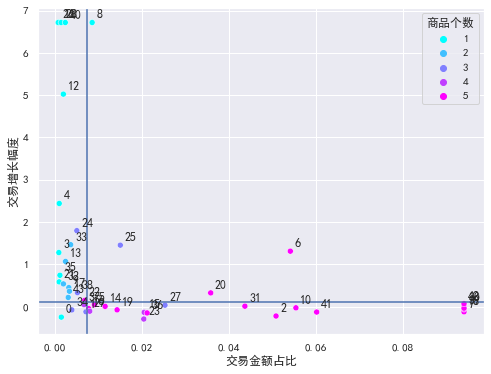

In [614]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='交易金额占比', y='交易增长幅度', data=bayer_prod_total, palette='cool', hue='商品个数')
plt.axhline(y=bayer_prod_total['交易增长幅度'].median())
plt.axvline(x=bayer_prod_total['交易金额占比'].median())
# plt.xlim(-0.015, 0.04)
for i in bayer_prod_total.index:
    plt.text(bayer_prod_total.iloc[i, 3] + 0.001, bayer_prod_total.iloc[i, 1] + 0.1, i)

In [ ]:
# 按照上课的思路对安速和科灵虫控进行此件按频分析, 画出他们的波士顿矩阵

In [15]:
def mask(s, q=0.9):
    threshold = s.quantile(q)
    s.loc[s >= threshold] = threshold
    return s

In [20]:
def data_process(df):
    df_total = df.groupby(by=['商品'])[['交易增长幅度']].mean()
    df_total['交易金额'] = df.groupby(by=['商品'])['交易金额'].sum()
    df_total['交易金额占比'] = df_total['交易金额'] / df_total['交易金额'].sum()
    df_total['商品个数'] = df.groupby(by=['商品'])['操作'].count()
    # 盖帽
    df_total['交易增长幅度'] = mask(df_total['交易增长幅度'].copy())
    df_total['交易金额占比'] = mask(df_total['交易金额占比'].copy())
    
    df_total.reset_index(inplace=True)
    return df_total

In [17]:
def drow_boston_matrix(df_total):   
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='交易金额占比', y='交易增长幅度', data=df_total, palette='cool', hue='商品个数')
    plt.axhline(y=df_total['交易增长幅度'].median())
    plt.axvline(x=df_total['交易金额占比'].median())
#     plt.xlim(-0.01, 0.04)
    for i in df_total.index:
        plt.text(df_total.iloc[i, 3] + 0.001, df_total.iloc[i, 1] + 0.1, i)

In [21]:
data_process(bayer_prod)

,商品,交易增长幅度,交易金额,交易金额占比,商品个数
0,17年德国拜耳进口蚂蚁药拜灭易灭蚁饵剂粉除杀蚂蚁杀虫剂全窝端,-0.247600,42340.55,0.000523,1
1,德国原装进口拜耳蟑螂药全窝端拜灭士5g+12g杀蟑胶饵剂粉屋捕捉器,-0.120333,197377.17,0.002439,3
2,德国拜耳 除敌跳蚤杀虫剂家用灭蟑螂药虱子杀潮虫臭虫除虫剂喷雾,-0.221080,1394780.59,0.017232,5
3,德国拜耳丁香医生限量款拜灭士加量家用蟑螂全窝端蟑螂药3支装,1.279300,26742.75,0.000330,1
4,德国拜耳上门除灭鼠灭白蚁蟑螂蚊子跳蚤苍蝇上海地区灭虫按件拍下,2.439300,28969.28,0.000358,1
5,德国拜耳拜灭士5g+拜灭易12g进口杀蟑螂蚂蚁药蟑螂克星家用全窝端,0.048340,251225.58,0.003104,5
6,德国拜耳拜灭士5g+除敌5ml*4支进口蟑螂药家用全窝端杀蟑螂套装,1.311740,1484952.41,0.018346,5
7,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,-0.121360,40103850.97,0.031863,5
8,德国拜耳拜灭士蟑螂药一窝端进口全窝端家用灭除杀蟑胶饵5g包邮,6.717030,236386.32,0.002920,1
9,德国拜耳拜灭易12g+除敌5ml*4支 进口蚂蚁药全窝端家用杀虫剂组合,0.450550,89566.01,0.001107,2


In [25]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

(-0.015, 0.045)

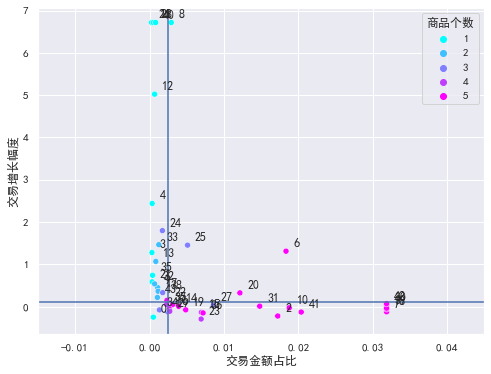

In [28]:
drow_boston_matrix(data_process(bayer_prod))
plt.xlim(-0.015, 0.045)

### 3.3流量结构分析

In [29]:
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data\竞争数据\流量渠道数据')

In [32]:
files = glob.glob('*.xlsx')
files

['安速家居旗舰店流量渠道.xlsx', '拜耳官方旗舰店流量渠道.xlsx', '科凌虫控旗舰店流量渠道.xlsx']

In [55]:
bayer_flow = pd.read_excel(files[1])

In [34]:
bayer_flow.head()

,流量来源,交易指数,交易指数.1,Unnamed: 3
0,淘内免费,399466,320128,NaN
1,手淘搜索,336457,274916,NaN
2,淘内免费其他,195308,153255,NaN
3,手淘问大家,123512,108108,NaN
4,手淘旺信,88024,59198,NaN


In [35]:
# 取交易指数前十的流量路口
bayer_flow = bayer_flow.sort_values(by='交易指数', ascending=False)[:10].copy()

In [37]:
bayer_flow.set_index(keys='流量来源', inplace=True)

In [41]:
# 付费流量
paid = ['付费流量', '直通车', '淘宝客', '淘宝联盟']

In [43]:
np.array([True if flow in paid else False for flow in bayer_flow.index]) * 0.1

array([0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0.1, 0. , 0.1])

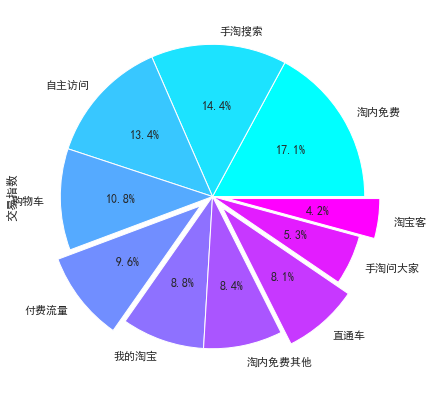

In [51]:
# 画饼状图
bayer_flow['交易指数'].plot(kind='pie', autopct='%.1f%%', cmap='cool', figsize=(7,7), explode=np.array([True if flow in paid else False for flow in bayer_flow.index]) * 0.1)
# 总交易指数
total_trade = bayer_flow['交易指数'].sum()
# 付费流量带来的交易指数
paid_flow_total = bayer_flow.loc[np.array([True if flow in paid else False for flow in bayer_flow.index]), '交易指数']
# 付费流量占比
paid_flow_ratio = paid_flow_total / total_trade

In [65]:
# 封装流量分析的函数
def flow_analysis(df, title):
    # 取交易指数前十的流量路口
    df = df.sort_values(by='交易指数', ascending=False)[:10].copy()
    df.set_index(keys='流量来源', inplace=True)
    # 画饼状图
    plt.title(title)
    df['交易指数'].plot(kind='pie', autopct='%.1f%%', cmap='cool', figsize=(7,7), explode=np.array([True if flow in paid else False for flow in df.index]) * 0.1)
    # 总交易指数
    total_trade = df['交易指数'].sum()
    # 付费流量带来的交易指数
    paid_flow_total = df.loc[np.array([True if flow in paid else False for flow in df.index]), '交易指数'].sum()
    # 付费流量占比
    paid_flow_ratio = paid_flow_total / total_trade
    print(f'总交易指数:{total_trade}, 付费流量带来的交易指数:{paid_flow_total}, 付费流量占比:{paid_flow_ratio}')

总交易指数:2334051, 付费流量带来的交易指数:509959, 付费流量占比:0.21848665688967378


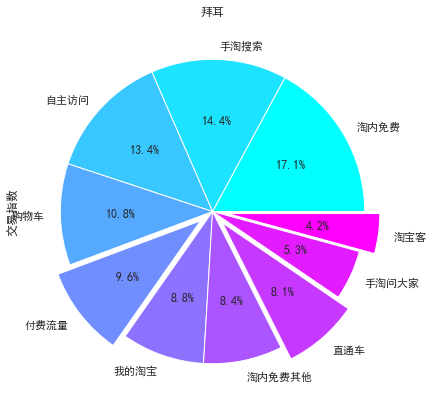

In [66]:
flow_analysis(bayer_flow, '拜耳')

In [71]:
ansu_flow = pd.read_excel(files[0])

In [ ]:
flow_analysis(bayer_flow, '拜耳')

In [69]:
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data\竞争数据\评论舆情数据')

In [72]:
files = glob.glob('*.xlsx')
files

['安速.xlsx', '德国拜耳.xlsx', '科林虫控.xlsx']

In [73]:
bayer_comments = pd.read_excel(files[1])

In [74]:
bayer_comments.shape

(1400, 5)

In [76]:
bayer_comments.drop_duplicates(subset=['评论'], inplace=True)

In [78]:
bayer_comments.head(20)

,产品名称,链接,评论页码,评论,评论日期
0,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一...,2018-11-21 19:01:20
1,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全...,2018-11-23 11:07:03
2,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑,2018-11-24 00:28:17
3,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里...,2018-11-25 03:07:25
4,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？,2018-11-26 07:49:43
5,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,强力推荐，第三次购买了，好好用的说，一次囤够了一个夏天的量。拜耳值得买,2018-11-18 00:03:06
6,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,宝贝已经收到，厨房，大厅，房间所有的墙角都有打，没看到蟑螂的尸体，好像没什么效果，但感觉蟑螂...,2018-11-19 11:37:03
7,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,收到货好几天了，昨天才拿出来用，结果还是不错的哈，效果很好，第二天早上看到好几只蟑螂死在厨房...,2018-11-21 21:12:49
8,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,买了蟑螂屋和拜耳，有几个小强的尸体。大部分都被蟑螂屋搞定了。双十一就是优惠，买2送2。拿两支...,2018-11-23 21:18:24
9,德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端,https://detail.tmall.com/item.htm?id=527604730327,0,以前几乎都没有认真评价过，不知道浪费了多少积 分。听说评价超过一百个字有送积分，基本上每 星...,2018-11-24 11:12:26


In [79]:
comments = bayer_comments.评论.values

In [80]:
comments

array(['刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一定要管用，一定要管用，准备看下后续效果会继续追加评价。不知道多久才能消灭干净，还在厨房，没法做饭了，都不愿意进去了。有点担心会挥发。看很多人在用也就试试吧。哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎',
       '朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全都点涂上了，四天之后回来开门的时候内心相当忐忑啊?? 不过居然一只都没见...也不知道是真的没有了，还是跟我错峰出行了....但愿是管用了，不然我真疯了！第二次购买了，超级好用，之前家里蟑螂都翻烂了，朋友推荐这个，买了两支送了一支，点上胶饵以后，',
       '真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑', ..., '物流挺快的客服也很贴心好评',
       '看起来不错，暂时没发现蟑螂',
       '买二送一，期待效果呀，这个是同事推荐并且指定的产品，希望好用以后就再来吧&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&hellip;&

In [83]:
comments = ' '.join(comments)

In [84]:
comments

'刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一定要管用，一定要管用，准备看下后续效果会继续追加评价。不知道多久才能消灭干净，还在厨房，没法做饭了，都不愿意进去了。有点担心会挥发。看很多人在用也就试试吧。哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎哎 朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全都点涂上了，四天之后回来开门的时候内心相当忐忑啊?? 不过居然一只都没见...也不知道是真的没有了，还是跟我错峰出行了....但愿是管用了，不然我真疯了！第二次购买了，超级好用，之前家里蟑螂都翻烂了，朋友推荐这个，买了两支送了一支，点上胶饵以后， 真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑 盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里不怕蟑螂的人处理的，所以我也不是很清楚&hellip;可以认真考虑家里常备啦，但是不太敢一次买很多，怕放不好变质了。还送了沉甸甸的一大包湿巾，很棒，可以用来给蟑螂尸体的地方消毒。 我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？ 强力推荐，第三次购买了，好好用的说，一次囤够了一个夏天的量。拜耳值得买 宝贝已经收到，厨房，大厅，房间所有的墙角都有打，没看到蟑螂的尸体，好像没什么效果，但感觉蟑螂没以前那么多了，目前还不知道效果到底如何，这是使用两天后的效果 收到货好几天了，昨天才拿出来用，结果还是不错的哈，效果很好，第二天早上看到好几只蟑螂死在厨房，以后还会继续回购的。双十一价格也比较实惠，不然平时买实在是太贵了，一并买了蚂蚁药，还没有用，这个季节好像也不太适合使用，没看到几只蚂蚁。不知道有没有效 买了蟑螂屋和拜耳，有几个小强的尸体。大部分都被蟑螂屋搞定了。双十一就是优惠，买2送2。拿两支给老妈用，希望能够干掉80%的小强。 哈哈，像鲨鱼一样干掉小强。 以前几乎都没有认真评价过，不知道浪费了多少积 分。听说评价超过一百个字有送积分，基本上每 星期都会光顾，统一评论，淘宝购物实在是太方便 了，根本停不下来，从此后买生活用品第一个想到 的就是淘宝，都是正品，一开始还担心，现在都习 惯了，真心不错的，现在还要多多给优惠呦，下次 还会再来的，都逛上了，哈啊哈哈哈哈。还是很不 错的宝贝真心不错，物超

In [81]:
import re

In [88]:
# 使用正则把非中英文的字符替换为空格
comments = re.sub(r'[^a-zA-Z\u4e00-\u9fa5]',' ', comments)

In [92]:
# !pip install jieba -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314477 sha256=59fe5b777612f96e1882ac3a64c17cd52ad387d2fd7fc541302cbe5ca100499d
  Stored in directory: c:\users\ause\appdata\local\pip\cache\wheels\86\f9\a0\ba1cbeb8600adb502fb5a499eb81fc848aabe1807ec9302f9e
Successfully built jieba


You should consider upgrading via the 'C:\Users\ause\Desktop\Python2101\2101\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [93]:
import jieba

In [95]:
# jieba分词有三种模式
s = '中华人民共和国万岁'
# 精简模式
jieba.lcut(s)

['中华人民共和国', '万岁']

In [96]:
# 全模式
jieba.lcut(s, cut_all=True)

['中华', '中华人民', '中华人民共和国', '华人', '人民', '人民共和国', '共和', '共和国', '万岁']

In [97]:
# 搜索模式
jieba.lcut_for_search(s)

['中华', '华人', '人民', '共和', '共和国', '中华人民共和国', '万岁']

In [103]:
# 使用精确模式对评论进行分词
comments = jieba.lcut(comments)

In [100]:
os.chdir(r'C:\Users\ause\Desktop\Python2101\2101\day20\data')

In [101]:
stop_words = pd.read_csv('./百度停用词表.txt', header=None).values.ravel().tolist()

In [102]:
stop_words

['--',
 '?',
 '“',
 '”',
 '》',
 '－－',
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'came',
 'can',
 'cannot',
 'cant',
 "can't",
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 "c'mon",
 'co',
 'com',


In [107]:
words = [word for word in comments if word != ' ']

In [111]:
from wordcloud import WordCloud

In [110]:
# !pip install wordcloud -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/


You should consider upgrading via the 'C:\Users\ause\Desktop\Python2101\2101\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [121]:
leaf = plt.imread('./leaf.jpg')

In [127]:
stop_words.extend(['效果', '都', '还', '双十', '小强', 'hellip'])

In [129]:
stop_words.extend(['不','蟑螂'])

(-0.5, 599.5, 299.5, -0.5)

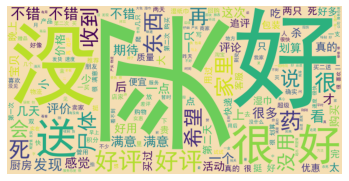

In [161]:
wc = WordCloud(font_path='./Simhei.ttf', width=600, height=300, stopwords=stop_words, background_color='wheat')
wc.generate(' '.join(words))
with sns.axes_style("ticks"):
    ax = f.add_subplot(1, 2, 1)
    plt.imshow(wc)
plt.axis('off')

In [131]:
# 提取关键字
from jieba import analyse

In [132]:
analyse.extract_tags(' '.join(words), withWeight=True)

[('蟑螂', 0.3707393632974221),
 ('效果', 0.22306764271964574),
 ('好评', 0.12675756159233206),
 ('hellip', 0.12121437265297845),
 ('双十', 0.09387267987181241),
 ('不错', 0.08509801891260456),
 ('小强', 0.08122968145154626),
 ('满意', 0.06067097862842839),
 ('湿巾', 0.05833441683924588),
 ('追评', 0.04697056940302915),
 ('非常', 0.046298426358977185),
 ('收到', 0.045715705691338406),
 ('没用', 0.04465442302292649),
 ('划算', 0.0398216456286635),
 ('好用', 0.0397916530878327),
 ('没有', 0.03965003400476235),
 ('看到', 0.0394610674522687),
 ('尸体', 0.03939477341779721),
 ('湿纸巾', 0.03787890614930292),
 ('东西', 0.036601228662814955)]